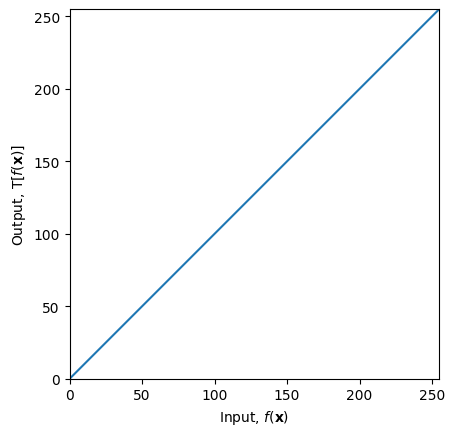

(664, 1601)


In [4]:
#Identity Transformation I

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = np.arange(0,256).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread(r"E:\UOM\Academic\Semester 5\Image processing and machine vision\Landscape-Color.jpg", cv.IMREAD_GRAYSCALE)
print(img_orig.shape)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

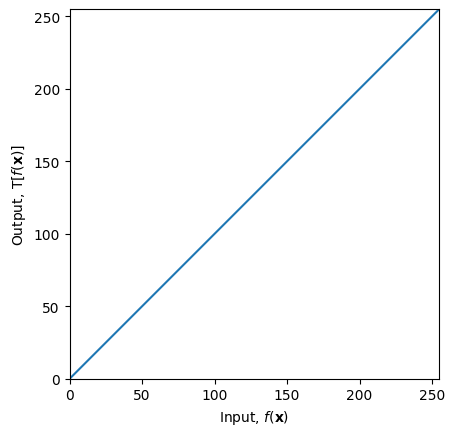

(664, 1601)


In [10]:
#Identity Transformation II

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = np.arange(0,256).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread(r"E:\UOM\Academic\Semester 5\Image processing and machine vision\Landscape-Color.jpg", cv.IMREAD_GRAYSCALE)
print(img_orig.shape)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = transform[img_orig]
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

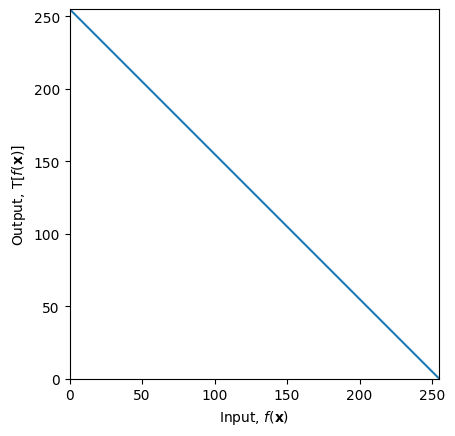

(1080, 1920)


In [11]:
#Identity Transformation II

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = np.arange(255,-1,-1).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread(r"E:\UOM\Academic\Semester 5\Image processing and machine vision\image.jpg", cv.IMREAD_GRAYSCALE)
print(img_orig.shape)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = transform[img_orig]
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

101
50
105
256


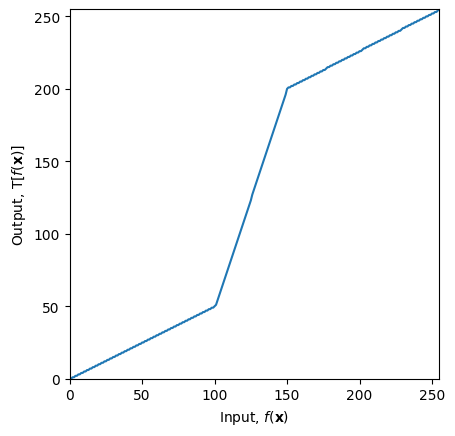

In [20]:
# Intensity Transform Windowing

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50) , (150, 200)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis = 0).astype('uint8')
transform = np.concatenate((transform,t3), axis = 0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread(r"E:\UOM\Academic\Semester 5\Image processing and machine vision\Landscape-Color.jpg", cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

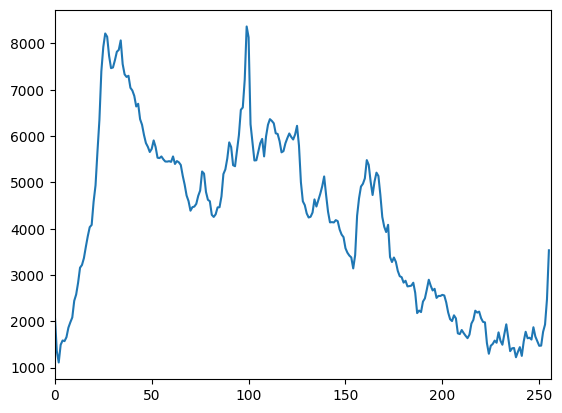

In [23]:
# Histogram of a Grayscale Image

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"E:\UOM\Academic\Semester 5\Image processing and machine vision\Landscape-Color.jpg", cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()


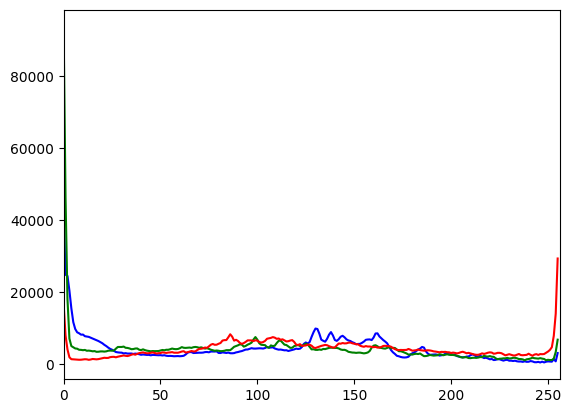

In [24]:
# Histogram of a Color Image

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"E:\UOM\Academic\Semester 5\Image processing and machine vision\Landscape-Color.jpg", cv.IMREAD_COLOR)

color = ('b' , 'g' , 'r')
for i,c in enumerate(color):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.show()

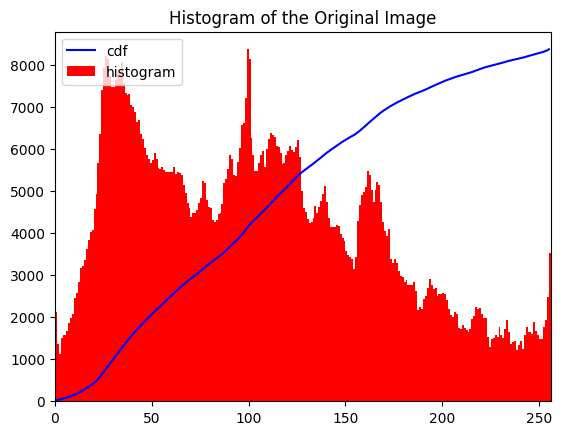

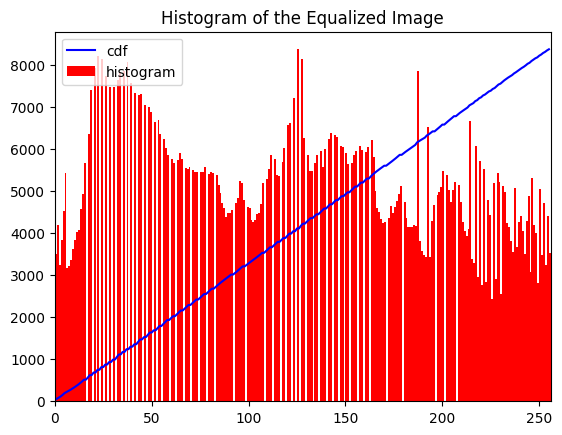

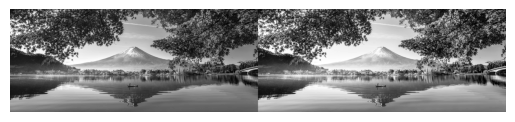

In [26]:
# Histogram Equalization

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(r"E:\UOM\Academic\Semester 5\Image processing and machine vision\Landscape-Color.jpg", cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.ravel(), 256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ = cv.equalizeHist(img)
hist, bins = np.histogram(equ.ravel(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max() / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title ('Histogram of the Equalized Image')
plt.show()
res = np.hstack((img,equ))
plt.axis('off')
plt.imshow(res, cmap = 'gray')

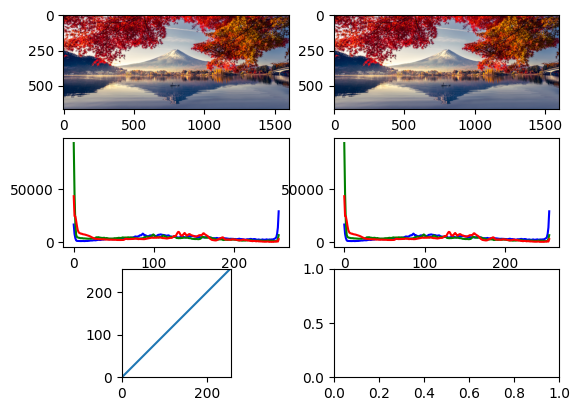

In [32]:
# gamma correction

%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread(r"E:\UOM\Academic\Semester 5\Image processing and machine vision\Landscape-Color.jpg", cv.IMREAD_COLOR)
gamma = 1
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)
f, axarr = plt.subplots(3,2)
axarr[0,0].imshow(img_orig)
axarr[0,1].imshow(img_gamma)
color = ('b' , 'g' , 'r')

for i,c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)

axarr[2,0].plot(table)
axarr[2,0].set_xlim(0,255)
axarr[2,0].set_ylim(0,255)
axarr[2,0].set_aspect('equal')